In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style='darkgrid')
import matplotlib.patches as patches

In [32]:
confirmed,recovered,deaths=pd.read_csv("time_series_19-covid-Confirmed.csv"),pd.read_csv("time_series_19-covid-Recovered.csv"),pd.read_csv("time_series_19-covid-Deaths.csv")
confirmed=confirmed.loc[:,"Country/Region":"3/23/20"]
recovered=recovered.loc[:,"Country/Region":"3/23/20"]
deaths=deaths.loc[:,"Country/Region":"3/23/20"]
confirmed.drop(["Lat","Long"],1,inplace=True)

deaths.drop(["Lat","Long"],1,inplace=True)
recovered.drop(["Lat","Long"],1,inplace=True)
confirmed.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,Thailand,2,3,5,7,8,8,14,14,14,...,82,114,147,177,212,272,322,411,599,599.0
1,Japan,2,1,2,2,4,4,7,7,11,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,Singapore,0,1,3,3,4,5,7,7,10,...,212,226,243,266,313,345,385,432,455,455.0
3,Nepal,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,Malaysia,0,0,0,3,4,4,4,7,8,...,238,428,566,673,790,900,1030,1183,1306,1306.0


In [33]:
confirmed["Country/Region"].value_counts()

US            249
China          33
Canada         12
France          9
Australia       9
             ... 
Vietnam         1
Cabo Verde      1
Uruguay         1
Portugal        1
Mayotte         1
Name: Country/Region, Length: 183, dtype: int64

In [34]:
confirmed=confirmed.groupby(["Country/Region"])[confirmed.columns[1:]].sum()
confirmed.reset_index(inplace=True)
confirmed.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,11,16,21,22,22,22,24,24,40,40.0
1,Albania,0,0,0,0,0,0,0,0,0,...,38,42,51,55,59,64,70,76,89,89.0
2,Algeria,0,0,0,0,0,0,0,0,0,...,37,48,54,60,74,87,90,139,201,201.0
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,1,2,39,39,53,75,88,113,113.0
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,2.0


In [35]:
confirmed["Country/Region"].value_counts()

Lithuania     1
Ireland       1
Indonesia     1
Kuwait        1
Grenada       1
             ..
Uruguay       1
Portugal      1
Iceland       1
US            1
Guadeloupe    1
Name: Country/Region, Length: 183, dtype: int64

In [36]:
confirmed["Country/Region"].nunique()


183

In [37]:
recovered=recovered.groupby(["Country/Region"])[recovered.columns[1:]].sum()
recovered.reset_index(inplace=True)
recovered.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1.0
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2.0
2,Algeria,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,32,32,32,65,65.0
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [38]:
deaths=deaths.groupby(["Country/Region"])[deaths.columns[1:]].sum()
deaths.reset_index(inplace=True)

deaths.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.0
1,Albania,0,0,0,0,0,0,0,0,0,...,1,1,1,1,2,2,2,2,2,2.0
2,Algeria,0,0,0,0,0,0,0,0,0,...,3,4,4,4,7,9,11,15,17,17.0
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.0
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


##### Checking for Missing Values

In [39]:
(confirmed.isnull().sum()/len(confirmed))/100

Country/Region    0.0
1/22/20           0.0
1/23/20           0.0
1/24/20           0.0
1/25/20           0.0
                 ... 
3/19/20           0.0
3/20/20           0.0
3/21/20           0.0
3/22/20           0.0
3/23/20           0.0
Length: 63, dtype: float64

In [40]:
(recovered.isnull().sum()/len(recovered))/100

Country/Region    0.0
1/22/20           0.0
1/23/20           0.0
1/24/20           0.0
1/25/20           0.0
                 ... 
3/19/20           0.0
3/20/20           0.0
3/21/20           0.0
3/22/20           0.0
3/23/20           0.0
Length: 63, dtype: float64

In [41]:
(deaths.isnull().sum()/len(deaths))/100

Country/Region    0.0
1/22/20           0.0
1/23/20           0.0
1/24/20           0.0
1/25/20           0.0
                 ... 
3/19/20           0.0
3/20/20           0.0
3/21/20           0.0
3/22/20           0.0
3/23/20           0.0
Length: 63, dtype: float64

##### Imputing Missing values to all Confirmed,Recovered,Deaths Data

In [42]:
def impute(x):
        x.fillna(value=0,inplace=True)
        return x
    

In [43]:
impute(confirmed)
impute(deaths)
impute(recovered)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1.0
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2.0
2,Algeria,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,32,32,32,65,65.0
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Uzbekistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
179,Venezuela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,15.0
180,Vietnam,0,0,0,0,0,0,0,0,0,...,16,16,16,16,16,16,16,17,17,17.0
181,Zambia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [44]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 63 columns):
Country/Region    183 non-null object
1/22/20           183 non-null int64
1/23/20           183 non-null int64
1/24/20           183 non-null int64
1/25/20           183 non-null int64
1/26/20           183 non-null int64
1/27/20           183 non-null int64
1/28/20           183 non-null int64
1/29/20           183 non-null int64
1/30/20           183 non-null int64
1/31/20           183 non-null int64
2/1/20            183 non-null int64
2/2/20            183 non-null int64
2/3/20            183 non-null int64
2/4/20            183 non-null int64
2/5/20            183 non-null int64
2/6/20            183 non-null int64
2/7/20            183 non-null int64
2/8/20            183 non-null int64
2/9/20            183 non-null int64
2/10/20           183 non-null int64
2/11/20           183 non-null int64
2/12/20           183 non-null int64
2/13/20           183 non-null int64
2/14/2

In [45]:
dea=[]
for i in deaths.columns[1:]:
    l=deaths[i].sum()
    dea.append(l)
    
        
ddeaths=pd.DataFrame(data=dea,index=deaths.columns[1:],columns=["Deaths"])
ddeaths.index.name='date'
# ddeaths.reset_index(inplace=True)
ddeaths.to_csv("Deathscsv.csv")


In [46]:
# ddeaths=pd.read_csv("Deathscsv.csv")
# ddeaths.head()

In [47]:
ddeaths=pd.read_csv("Deathscsv.csv",index_col=["date"],parse_dates=["date"])

In [48]:

del ddeaths.index.name
ddeaths.head()

,Deaths
2020-01-22,17.0
2020-01-23,18.0
2020-01-24,26.0
2020-01-25,42.0
2020-01-26,56.0


In [49]:
ddeaths.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 2020-01-22 to 2020-03-23
Data columns (total 1 columns):
Deaths    62 non-null float64
dtypes: float64(1)
memory usage: 992.0 bytes


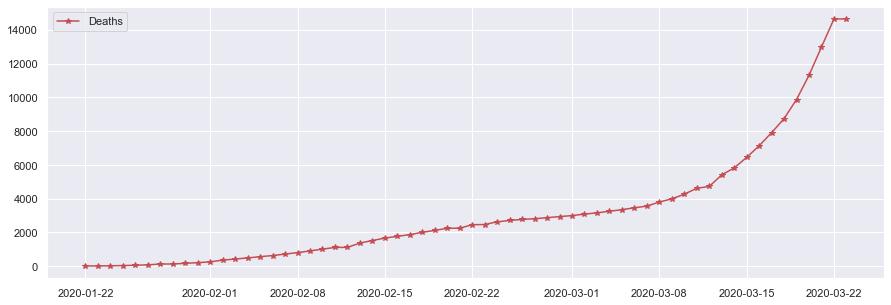

In [50]:
plt.figure(figsize=(15,5))
plt.plot(ddeaths["Deaths"],marker="*",color='r',label='Deaths')
plt.legend()

In [51]:
rec=[]
for i in recovered.columns[1:]:
    l=recovered[i].sum()
    rec.append(l)
    
        
rrecovered=pd.DataFrame(data=rec,index=recovered.columns[1:],columns=["Recovered"])  
rrecovered.index.name='date'
rrecovered.to_csv("Recoveredcsv.csv")


In [52]:
rrecovered=pd.read_csv("Recoveredcsv.csv",index_col=["date"],parse_dates=["date"])
del rrecovered.index.name
rrecovered.head()

,Recovered
2020-01-22,28.0
2020-01-23,30.0
2020-01-24,36.0
2020-01-25,39.0
2020-01-26,52.0


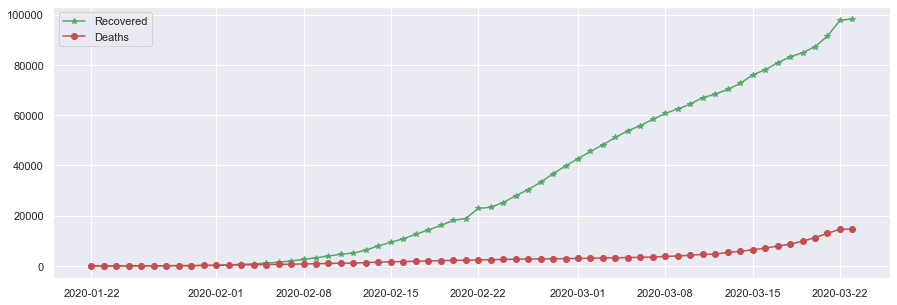

In [53]:
plt.figure(figsize=(15,5))
plt.plot(rrecovered["Recovered"],marker="*",color='g',label='Recovered')
plt.plot(ddeaths["Deaths"],marker="o",color='r',label='Deaths')
plt.legend()

In [54]:
conf=[]
for i in confirmed.columns[1:]:
    l=confirmed[i].sum()
    conf.append(l)
    
        
cconfirmed=pd.DataFrame(data=conf,index=confirmed.columns[1:],columns=["Confirmed"])  
cconfirmed.index.name='date'
cconfirmed.to_csv("Confirmedcsv.csv")


In [55]:
cconfirmed=pd.read_csv("Confirmedcsv.csv",index_col=["date"],parse_dates=["date"])
del cconfirmed.index.name
cconfirmed.head()

,Confirmed
2020-01-22,555.0
2020-01-23,653.0
2020-01-24,941.0
2020-01-25,1434.0
2020-01-26,2118.0


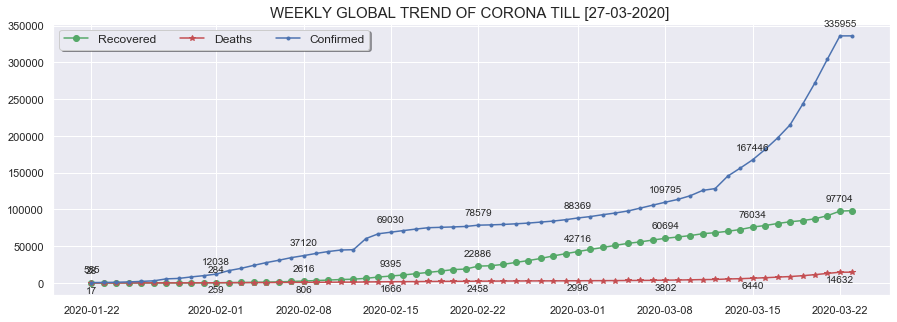

In [124]:
plt.figure(figsize=(15,5))
plt.plot(rrecovered["Recovered"],marker="o",color='g',label='Recovered')
plt.plot(ddeaths["Deaths"],marker="*",color='r',label='Deaths')
plt.plot(cconfirmed["Confirmed"],marker=".",color='b',label='Confirmed')
plt.legend(loc='upper left', fontsize=12, fancybox=True, ncol=10, shadow=True)
l=["2020-01-22","2020-02-01","2020-02-08","2020-02-15",'2020-02-22','2020-03-01','2020-03-08','2020-03-15',"2020-03-22"]
z=[rrecovered,cconfirmed]
t=["Recovered","Confirmed"]
for k,v in zip(z,t):
   
                                 
    for j in l:
        y=int(k[v][k.index==j])
        label = "{:.0f}".format(y)
        plt.annotate(label, # this is the text
                 (j,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') 
a=[ddeaths]
b=["Deaths"]
for c,d in zip(a,b):
   
                                 
    for j in l:
        y=int(c[d][c.index==j])
        label = "{:.0f}".format(y)
        plt.annotate(label, # this is the text
                 (j,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,-10), # distance from text to points (x,y)
                 ha='center') 



plt.title("WEEKLY GLOBAL TREND OF CORONA TILL [27-03-2020] ",fontdict={'size':15})
plt.savefig("WEEKLY Global Trend of CORONA")
plt.show()

In [57]:
res = zip(conf,rec,dea)
counts_row = pd.DataFrame(data=res, index=cconfirmed.index, columns=['Confirmed', 'Recovered', 'Deaths'])  

In [58]:
counts_row.head()

,Confirmed,Recovered,Deaths
2020-01-22,555.0,28.0,17.0
2020-01-23,653.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1434.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0


In [59]:
counts_row["Confirmed"]

2020-01-22       555.0
2020-01-23       653.0
2020-01-24       941.0
2020-01-25      1434.0
2020-01-26      2118.0
                ...   
2020-03-19    242708.0
2020-03-20    272166.0
2020-03-21    304524.0
2020-03-22    335955.0
2020-03-23    336004.0
Name: Confirmed, Length: 62, dtype: float64

In [60]:
TotalData=counts_row.to_csv('DateWiseCOVID19.csv')


#### Date Wise Data

In [61]:
DateWise=pd.read_csv("DateWiseCOVID19.csv",index_col="Unnamed: 0")
DateWise.head()

,Confirmed,Recovered,Deaths
2020-01-22,555.0,28.0,17.0
2020-01-23,653.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1434.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0


#### Lets see the Trend of INDIVIDUAL COUNTRIES

In [62]:
# conf=[]
# for i in confirmed.columns[1:]:
#     conf.append(confirmed[i].sum())
    
# conf1=pd.DataFrame(data=conf,index=confirmed.columns[1:],columns="Country/Region")

In [63]:
print("The Total No. of Countries present in the Analysis: ",confirmed["Country/Region"].value_counts().count())

The Total No. of Countries present in the Analysis:  183


#### Country Wise Total Data

In [64]:
data1=confirmed.iloc[:,[0,62]].rename({'3/23/20':'Confirmed'},axis=1)
data2=recovered.iloc[:,[0,62]].rename({'3/23/20':'Recovered'},axis=1)
data3=deaths.iloc[:,[0,62]].rename({'3/23/20':'Deaths'},axis=1)

In [65]:
CountryWise=pd.concat([data1,data2,data3],axis=1,join_axes=[data2.index],sort=True)
CountryWise=CountryWise.iloc[:,[0,1,3,5]].rename({"Country/Region":'Country'},axis=1)
CountryWise.head()

,Country,Confirmed,Recovered,Deaths
0,Afghanistan,40.0,1.0,1.0
1,Albania,89.0,2.0,2.0
2,Algeria,201.0,65.0,17.0
3,Andorra,113.0,1.0,1.0
4,Angola,2.0,0.0,0.0


In [66]:
CountryWise.sort_values(by='Country',axis=0,
    ascending=True,
    inplace=True)
CountryWise.reset_index(inplace=True)
CountryWise=CountryWise.iloc[:,1:]
CountryWise.head()


,Country,Confirmed,Recovered,Deaths
0,Afghanistan,40.0,1.0,1.0
1,Albania,89.0,2.0,2.0
2,Algeria,201.0,65.0,17.0
3,Andorra,113.0,1.0,1.0
4,Angola,2.0,0.0,0.0


In [67]:
CountryWiseCOVID2019=CountryWise.to_csv("CountryWiseCOVID2019.csv")

In [68]:
DateWise.columns

Index(['Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [69]:
# coldata=[Confirmed,Deaths,Recovered]
# for i in coldata:
#     if i == "Confirmed":
#         plt.plot(DateWise["Country"]=="India",marker='*',color='g',label='Confirmed')
#     elif i=="Deaths":
#         plt.plot(DateWise["Country"]=="India",marker='-',color='r',label='Deaths')
#     else:
#         plt.plot(DateWise["Country"]=="India",marker='o',color='b',label='Recovered')
        

In [70]:
# coldata=[Confirmed,Deaths,Recovered]
# print(coldata)

In [71]:
confirmedTransponse=confirmed.T
confirmedTransponse.head()

,0,1,2,3,4,5,6,7,8,9,...,173,174,175,176,177,178,179,180,181,182
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [72]:
new_header = confirmedTransponse.iloc[0] 

# take the rest of the data minus the header row
confirmedTransponse = confirmedTransponse[1:] 
# set the header row as the df header
confirmedTransponse.columns = new_header
# confirmedTransponse.reset_index(inplace=True)

# confirmedTransponse=confirmedTransponse.iloc[1:].head()
new_header

0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
178     Uzbekistan
179      Venezuela
180        Vietnam
181         Zambia
182       Zimbabwe
Name: Country/Region, Length: 183, dtype: object

In [73]:
confirmedTransponse.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,2,0,0


In [74]:
# confirmedTransponse.set_index(confirmedTransponse["Country/Region"],inplace=True)

In [75]:
# del confirmedTransponse.index.name
confirmedTransponse.index = pd.to_datetime(confirmedTransponse.index)

In [76]:
type(confirmedTransponse.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [77]:
# confirmedTransponse.index.name="Country/Region"
confirmedTransponse.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,2,0,0


In [78]:
# confirmedTransponse.index.name= None


In [79]:
recoveredTransponse=recovered.T
recoveredTransponse.head()

,0,1,2,3,4,5,6,7,8,9,...,173,174,175,176,177,178,179,180,181,182
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
new_header = recoveredTransponse.iloc[0] 

# take the rest of the data minus the header row
recoveredTransponse = recoveredTransponse[1:] 
# set the header row as the df header
recoveredTransponse.columns = new_header

In [81]:
recoveredTransponse.index = pd.to_datetime(recoveredTransponse.index)

In [82]:
recoveredTransponse.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
deathsTransponse=deaths.T


In [84]:
new_header = deathsTransponse.iloc[0] 

# take the rest of the data minus the header row
deathsTransponse = deathsTransponse[1:] 
# set the header row as the df header
deathsTransponse.columns = new_header

In [85]:
deathsTransponse.index = pd.to_datetime(deathsTransponse.index)

In [86]:
deathsTransponse.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
type(deathsTransponse.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [88]:
# fig, ax = plt.subplots(figsize=(2,2))
# ax.plot(confirmedTransponse.index,confirmedTransponse["China"],marker='o',color='b',label='Confirmed')
# for i, cty in enumerate(confirmedTransponse['China']):
#     ax.text(i, int(cty)+0.1, round(cty, 1), horizontalalignment='center')


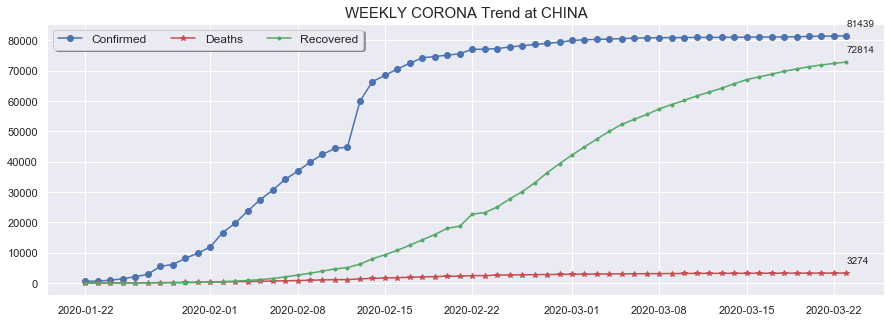

In [89]:
plt.figure(figsize=(15,5))
plt.plot(confirmedTransponse["China"],marker='o',color='b',label='Confirmed')
plt.plot(deathsTransponse["China"],marker='*',color='r',label='Deaths')
plt.plot(recoveredTransponse['China'],marker='.',color='g',label='Recovered')
plt.legend(loc='upper left', fontsize=12, fancybox=True, ncol=10, shadow=True)

for i in ["China"]:
    for j in [confirmedTransponse,deathsTransponse,recoveredTransponse]:
        x=j.index[-1]
        y=j[i][j.index[-1]]
        label = "{:.0f}".format(y)
        plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='left') 
plt.title("WEEKLY CORONA Trend at CHINA TILL [27-03-2020]",fontdict={'size':15})

plt.savefig("WEEKLY China's Trend of CORONA")

plt.show()

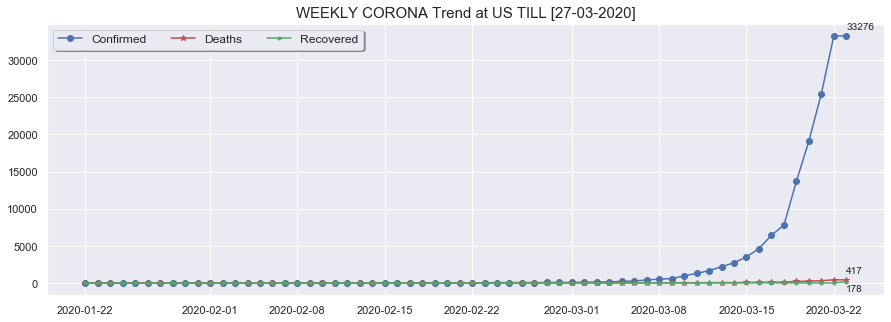

In [110]:
plt.figure(figsize=(15,5))
plt.plot(confirmedTransponse["US"],marker='o',color='b',label='Confirmed')
plt.plot(deathsTransponse["US"],marker='*',color='r',label='Deaths')
plt.plot(recoveredTransponse['US'],marker='.',color='g',label='Recovered')
plt.legend(loc='upper left', fontsize=12, fancybox=True, ncol=10, shadow=True)

for i in ["US"]:
    for j in [confirmedTransponse,deathsTransponse]:
        x=j.index[-1]
        y=j[i][j.index[-1]]
        label = "{:.0f}".format(y)
        plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,7), # distance from text to points (x,y)
                 ha='left') 
for i in ["US"]:
    for j in [recoveredTransponse]:
        x=j.index[-1]
        y=j[i][j.index[-1]]
        label = "{:.0f}".format(y)
        plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,-10), # distance from text to points (x,y)
                 ha='left') 
plt.title("WEEKLY CORONA Trend at US TILL [27-03-2020]",fontdict={'size':15})

plt.savefig("WEEKLY US Trend of CORONA")

plt.show()

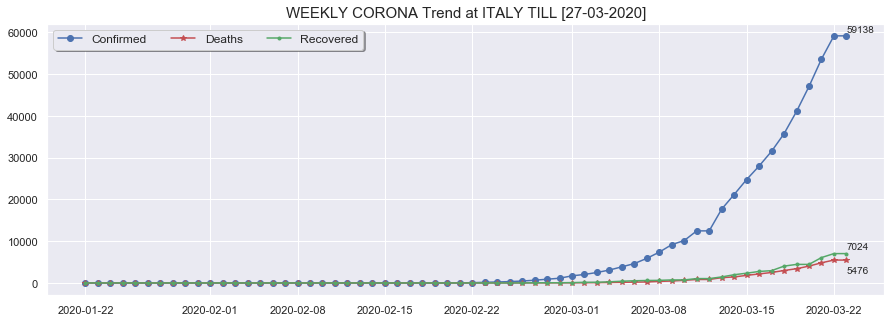

In [116]:
plt.figure(figsize=(15,5))
plt.plot(confirmedTransponse["Italy"],marker='o',color='b',label='Confirmed')
plt.plot(deathsTransponse["Italy"],marker='*',color='r',label='Deaths')
plt.plot(recoveredTransponse['Italy'],marker='.',color='g',label='Recovered')
plt.legend(loc='upper left', fontsize=12, fancybox=True, ncol=10, shadow=True)

for i in ["Italy"]:
    for j in [confirmedTransponse,recoveredTransponse]:
        x=j.index[-1]
        y=j[i][j.index[-1]]
        label = "{:.0f}".format(y)
        plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,4), # distance from text to points (x,y)
                 ha='left') 
for i in ["Italy"]:
    for j in [deathsTransponse]:
        x=j.index[-1]
        y=j[i][j.index[-1]]
        label = "{:.0f}".format(y)
        plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,-13), # distance from text to points (x,y)
                 ha='left') 
plt.title("WEEKLY CORONA Trend at ITALY TILL [27-03-2020]",fontdict={'size':15})

plt.savefig("WEEKLY Italy Trend of CORONA")

plt.show()

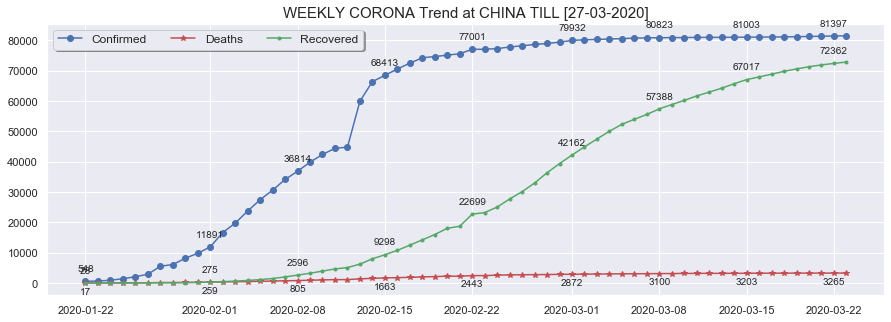

In [118]:
plt.figure(figsize=(15,5))
plt.plot(confirmedTransponse["China"],marker='o',color='b',label='Confirmed')
plt.plot(deathsTransponse["China"],marker='*',color='r',label='Deaths')
plt.plot(recoveredTransponse['China'],marker='.',color='g',label='Recovered')
plt.legend(loc='upper left', fontsize=12, fancybox=True, ncol=10, shadow=True)
l=["2020-01-22","2020-02-01","2020-02-08","2020-02-15",'2020-02-22','2020-03-01','2020-03-08','2020-03-15',"2020-03-22"]
for i in [confirmedTransponse,recoveredTransponse]:
   
                                 
    for j in l:
        y=int(i["China"][i.index==j])
        label = "{:.0f}".format(y)
        plt.annotate(label, # this is the text
                 (j,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') 
for i in [deathsTransponse]:
   
                                 
    for j in l:
        y=int(i["China"][i.index==j])
        label = "{:.0f}".format(y)
        plt.annotate(label, # this is the text
                 (j,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,-11), # distance from text to points (x,y)
                 ha='center') 
plt.title("WEEKLY CORONA Trend at CHINA TILL [27-03-2020]",fontdict={'size':15})

plt.savefig("China's  WEEKLY Trend of CORONA")

plt.show()

In [91]:
# import matplotlib.dates as mdates
# (mdates.date2num(x[1]), y[1]), xytext=(15, 15)

In [92]:
recoveredTransponse["China"][recoveredTransponse.index=="2020-03-23"]

2020-03-23    72814
Name: China, dtype: object

In [93]:
type(recoveredTransponse.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [94]:
# x=recoveredTransponse.index[0::7]
# y=list(recoveredTransponse[i][recoveredTransponse.index[0::7]].values)
# # print(y)
# for k,h in zip(y,x):
#     print(k,h)
    
recoveredTransponse.loc["2020-01-22"]

Country/Region
Afghanistan    0
Albania        0
Algeria        0
Andorra        0
Angola         0
              ..
Uzbekistan     0
Venezuela      0
Vietnam        0
Zambia         0
Zimbabwe       0
Name: 2020-01-22 00:00:00, Length: 183, dtype: object

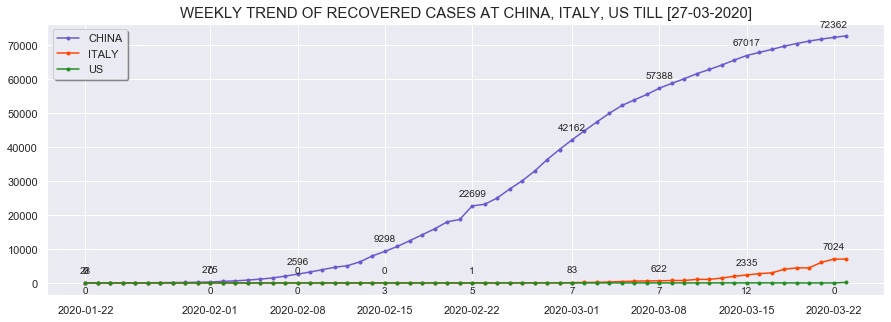

<Figure size 432x288 with 0 Axes>

In [119]:
plt.figure(figsize=(15,5))
plt.plot(recoveredTransponse['China'],marker='.',color='#6A5ACD',label='CHINA')
plt.plot(recoveredTransponse['Italy'],marker='.',color='#FF4500',label='ITALY')
plt.plot(recoveredTransponse['US'],marker='.',color='#228B22',label='US')
plt.legend(shadow=True)
l=["2020-01-22","2020-02-01","2020-02-08","2020-02-15",'2020-02-22','2020-03-01','2020-03-08','2020-03-15',"2020-03-22"]



for i in ["China","Italy"]:
   
                                 
    for j in l:
        y=int(recoveredTransponse[i][recoveredTransponse.index==j])
        label = "{:.0f}".format(y)
        plt.annotate(label, # this is the text
                 (j,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') 

for i in ["US"]:
   
                                 
    for j in l:
        y=int(recoveredTransponse[i][recoveredTransponse.index==j])
        label = "{:.0f}".format(y)
        plt.annotate(label, # this is the text
                 (j,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,-10), # distance from text to points (x,y)
                 ha='center') 
plt.title("WEEKLY TREND OF RECOVERED CASES AT CHINA, ITALY, US TILL [27-03-2020]",fontdict={'size':15})
plt.show()
plt.savefig("China,US,Italy REC Trend of CORONA")

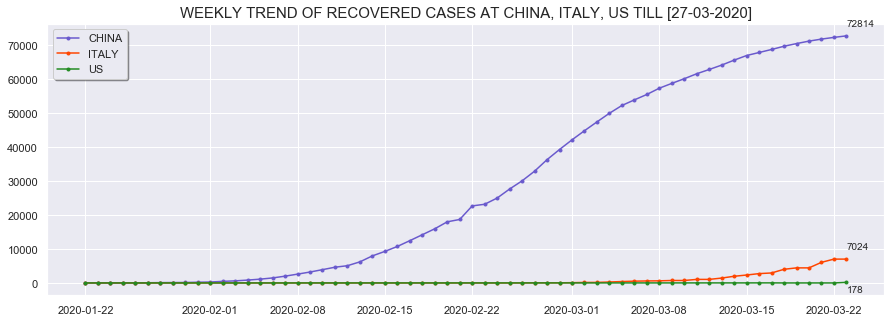

<Figure size 432x288 with 0 Axes>

In [121]:
plt.figure(figsize=(15,5))
plt.plot(recoveredTransponse['China'],marker='.',color='#6A5ACD',label='CHINA')
plt.plot(recoveredTransponse['Italy'],marker='.',color='#FF4500',label='ITALY')
plt.plot(recoveredTransponse['US'],marker='.',color='#228B22',label='US')
plt.legend(shadow=True)
x=recoveredTransponse.index[-1]
for i in ["China","Italy"]:
    y=recoveredTransponse[i][recoveredTransponse.index[-1]]
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='left')
for i in ["US"]:
    y=recoveredTransponse[i][recoveredTransponse.index[-1]]
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,-10), # distance from text to points (x,y)
                 ha='left')
plt.title("WEEKLY TREND OF RECOVERED CASES AT CHINA, ITALY, US TILL [27-03-2020]",fontdict={'size':15})
plt.show()
plt.savefig("China,US,Italy RECoverd Trend of CORONA")

In [176]:
deathsTransponse["Italy"][deathsTransponse.index[-1]]

5476.0

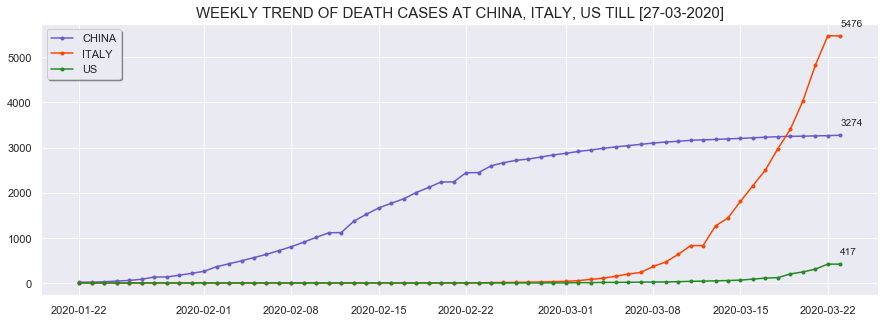

In [97]:
plt.figure(figsize=(15,5))
plt.plot(deathsTransponse['China'],marker='.',color='#6A5ACD',label='CHINA')
plt.plot(deathsTransponse['Italy'],marker='.',color='#FF4500',label='ITALY')
plt.plot(deathsTransponse['US'],marker='.',color='#228B22',label='US')
plt.legend(shadow=True)
x=deathsTransponse.index[-1]
for i in ["China","Italy","US"]:
    y=deathsTransponse[i][deathsTransponse.index[-1]]
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='left') 

plt.title("WEEKLY TREND OF DEATH CASES AT CHINA, ITALY, US TILL [27-03-2020]",fontdict={'size':15})
plt.savefig("China,US,Italy DEATH Trend of CORONA")
plt.show()


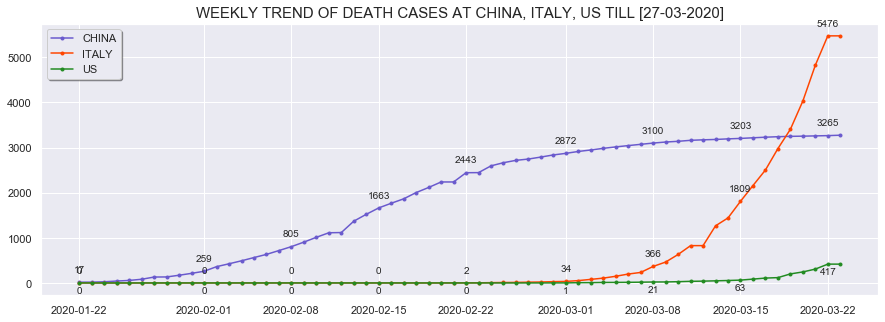

In [122]:
plt.figure(figsize=(15,5))
plt.plot(deathsTransponse['China'],marker='.',color='#6A5ACD',label='CHINA')
plt.plot(deathsTransponse['Italy'],marker='.',color='#FF4500',label='ITALY')
plt.plot(deathsTransponse['US'],marker='.',color='#228B22',label='US')
plt.legend(shadow=True)
l=["2020-01-22","2020-02-01","2020-02-08","2020-02-15",'2020-02-22','2020-03-01','2020-03-08','2020-03-15',"2020-03-22"]



for i in ["China","Italy"]:
   
                                 
    for j in l:
        y=int(deathsTransponse[i][deathsTransponse.index==j])
        label = "{:.0f}".format(y)
        plt.annotate(label, # this is the text
                 (j,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
        
for i in ["US"]:
   
                                 
    for j in l:
        y=int(deathsTransponse[i][deathsTransponse.index==j])
        label = "{:.0f}".format(y)
        plt.annotate(label, # this is the text
                 (j,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,-10), # distance from text to points (x,y)
                 ha='center')

plt.title("WEEKLY TREND OF DEATH CASES AT CHINA, ITALY, US TILL [27-03-2020]",fontdict={'size':15})
plt.savefig("China,US,Italy DEATH Trend rate of CORONA")
plt.show()
